<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [56]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

from matplotlib.lines import Line2D


## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [57]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


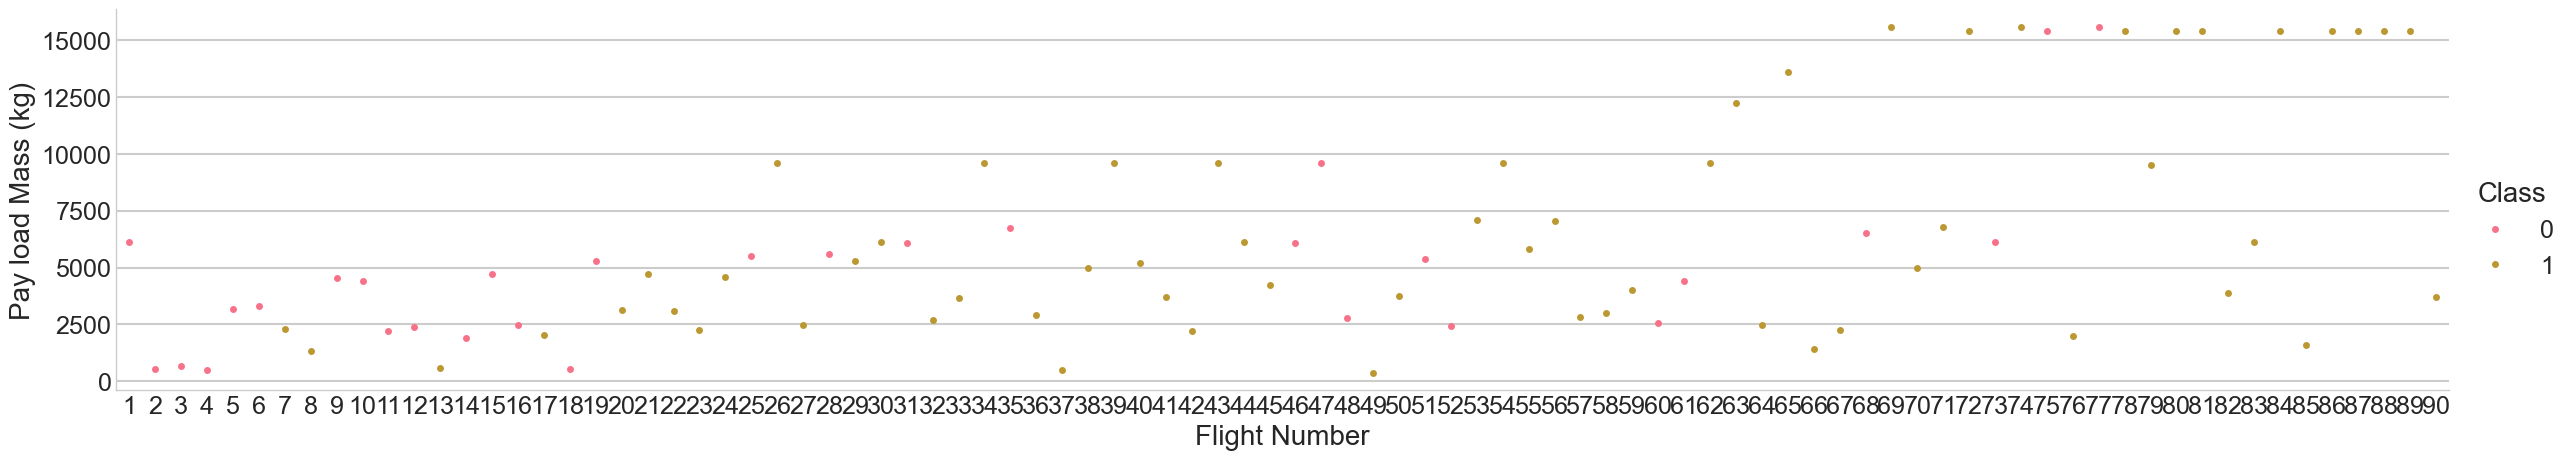

In [58]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


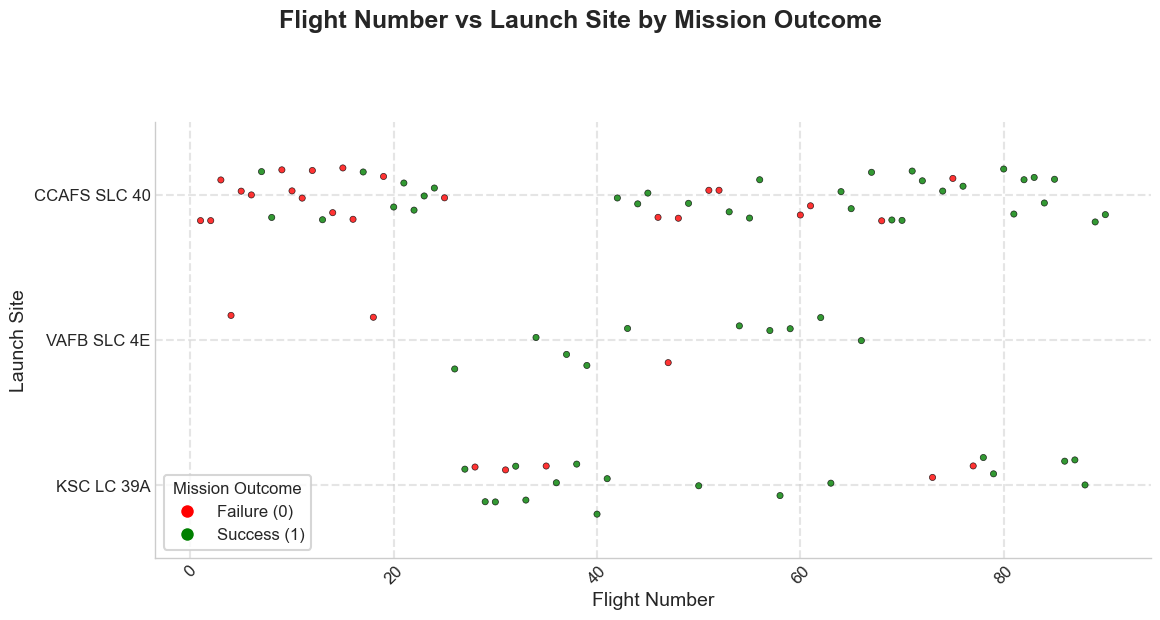

In [59]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value


# Set the style
sns.set_style("whitegrid")

# Create the catplot with custom colors
g = sns.catplot(
    x="FlightNumber", 
    y="LaunchSite", 
    hue="Class", 
    data=df, 
    kind="strip",
    aspect=2,
    height=6,
    edgecolor="black",
    linewidth=0.5,
    alpha=0.8,
    s=20,
    jitter=0.2,
    palette={0: "red", 1: "green"},
    legend=False  # We'll create our own legend
)

# Customize the plot
g.fig.suptitle("Flight Number vs Launch Site by Mission Outcome", 
               y=1.05, fontsize=18, fontweight='bold')
g.set_axis_labels("Flight Number", "Launch Site", fontsize=14)

# Create custom legend with correct colors
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Failure (0)',
           markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Success (1)',
           markerfacecolor='green', markersize=10)
]

# Position legend in top right
g.ax.legend(
    handles=legend_elements,
    title="Mission Outcome",
    loc='lower left',
    frameon=True,
    fontsize=12,
    title_fontsize=12
)

# Adjust tick labels
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Custom grid
plt.grid(True, linestyle='--', alpha=0.5, axis='both')

plt.tight_layout()
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


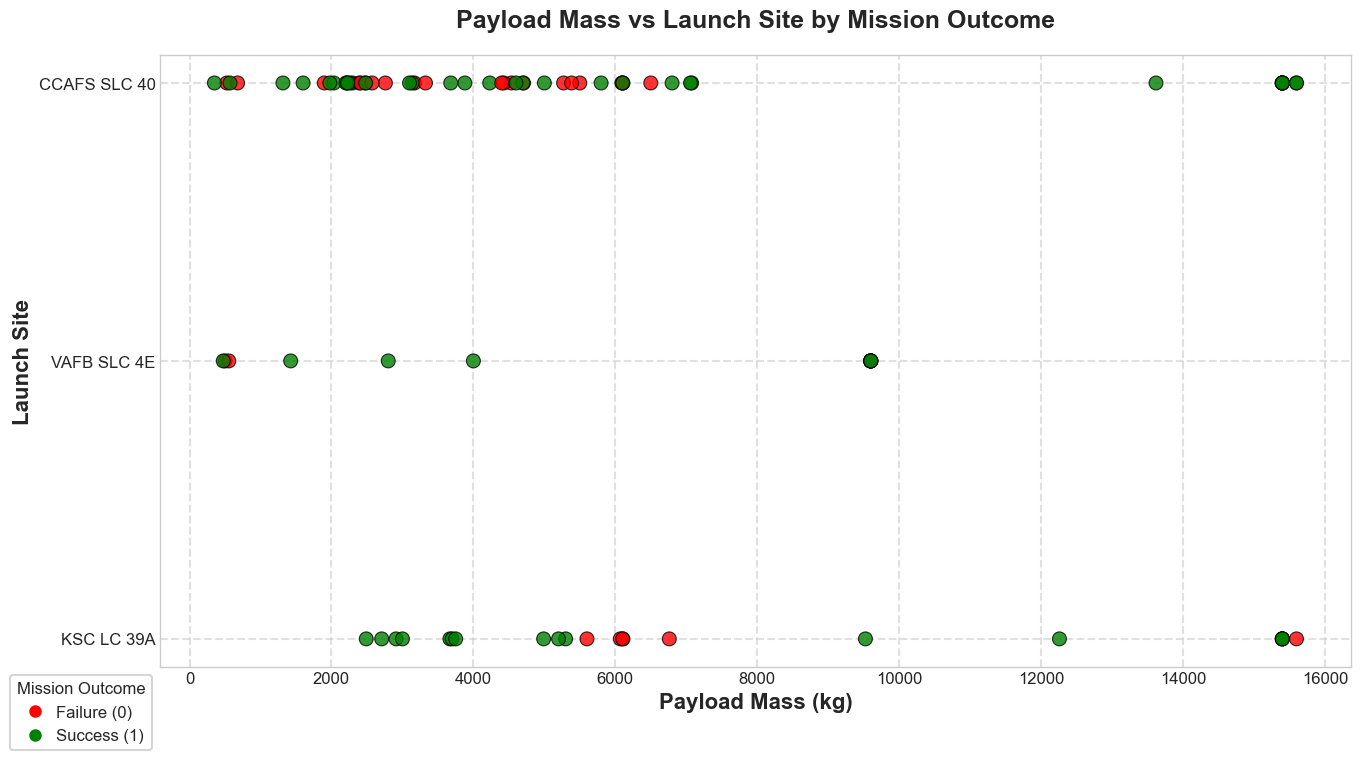

In [60]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

plt.figure(figsize=(14, 8))

# Create scatter plot with custom styling
sns.scatterplot(
    x="PayloadMass", 
    y="LaunchSite", 
    hue="Class", 
    data=df,
    palette={0: "red", 1: "green"},
    s=100,  # Larger point size
    edgecolor="black",
    linewidth=0.8,
    alpha=0.8,
    legend=False  # We'll create our own legend
)

# Customize plot appearance
plt.xlabel("Payload Mass (kg)", fontsize=16, fontweight='bold')
plt.ylabel("Launch Site", fontsize=16, fontweight='bold')
plt.title("Payload Mass vs Launch Site by Mission Outcome", 
          fontsize=18, fontweight='bold', pad=20)

# Create custom legend with correct colors (exactly as you specified)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Failure (0)',
           markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Success (1)',
           markerfacecolor='green', markersize=10)
]

# Position legend
plt.legend(
    handles=legend_elements,
    title="Mission Outcome",
    loc='best',
    frameon=True,
    fontsize=12,
    title_fontsize=12,
    bbox_to_anchor=(0.0, 0.0),  # Precise lower left positioning
    handletextpad=0.3  # Space between marker and text
)

# Customize grid and ticks
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

plt.show()

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


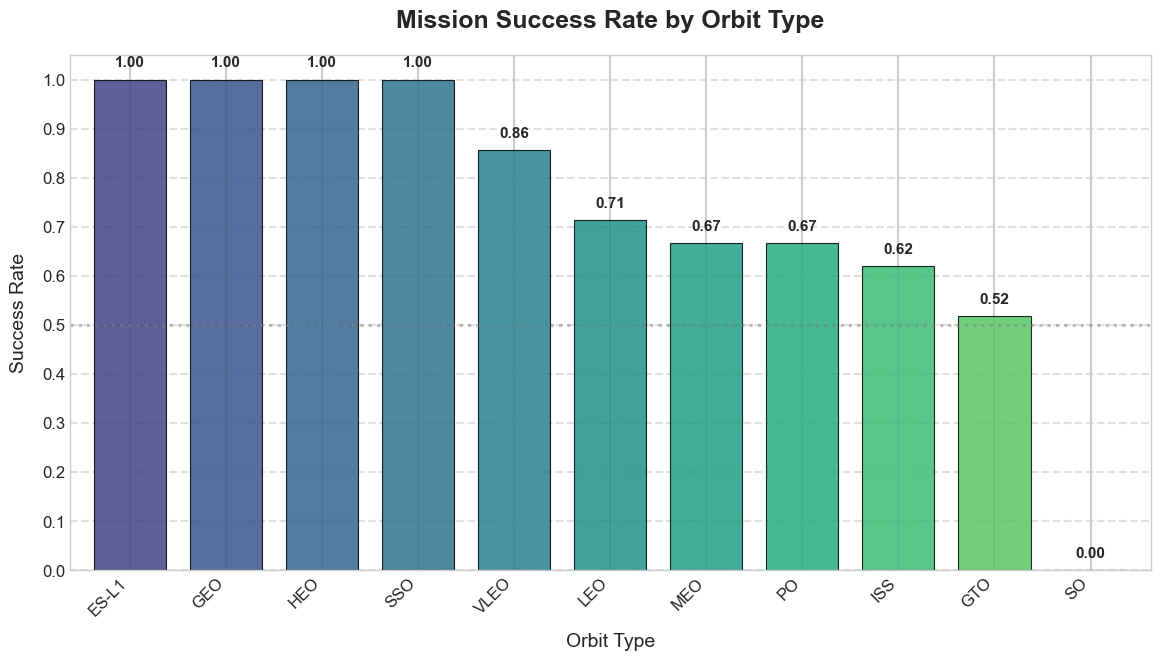

In [61]:
# HINT use groupby method on Orbit column and get the mean of Class column
# Calculate success rate by orbit
success_rate_by_orbit = df.groupby('Orbit')['Class'].mean().sort_values(ascending=False)

# Create figure with custom style
plt.figure(figsize=(12, 7))
plt.style.use('seaborn-v0_8-whitegrid')

# Create bar plot with enhanced styling
ax = success_rate_by_orbit.plot(
    kind='bar',
    color=plt.cm.viridis(np.linspace(0.2, 0.8, len(success_rate_by_orbit))),  # Color gradient
    edgecolor='black',
    linewidth=0.8,
    alpha=0.85,
    width=0.75  # Slightly thinner bars for elegance
)

# Customize title and labels with improved formatting
plt.title('Mission Success Rate by Orbit Type', 
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Orbit Type', fontsize=14, labelpad=10)
plt.ylabel('Success Rate', fontsize=14, labelpad=10)

# Customize ticks and grid
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels with improved positioning
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.02,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold')

# Add horizontal line at 50% for reference
plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)


# Adjust layout
plt.tight_layout()
plt.show()

Analyze the plotted bar chart to identify which orbits have the highest success rates.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


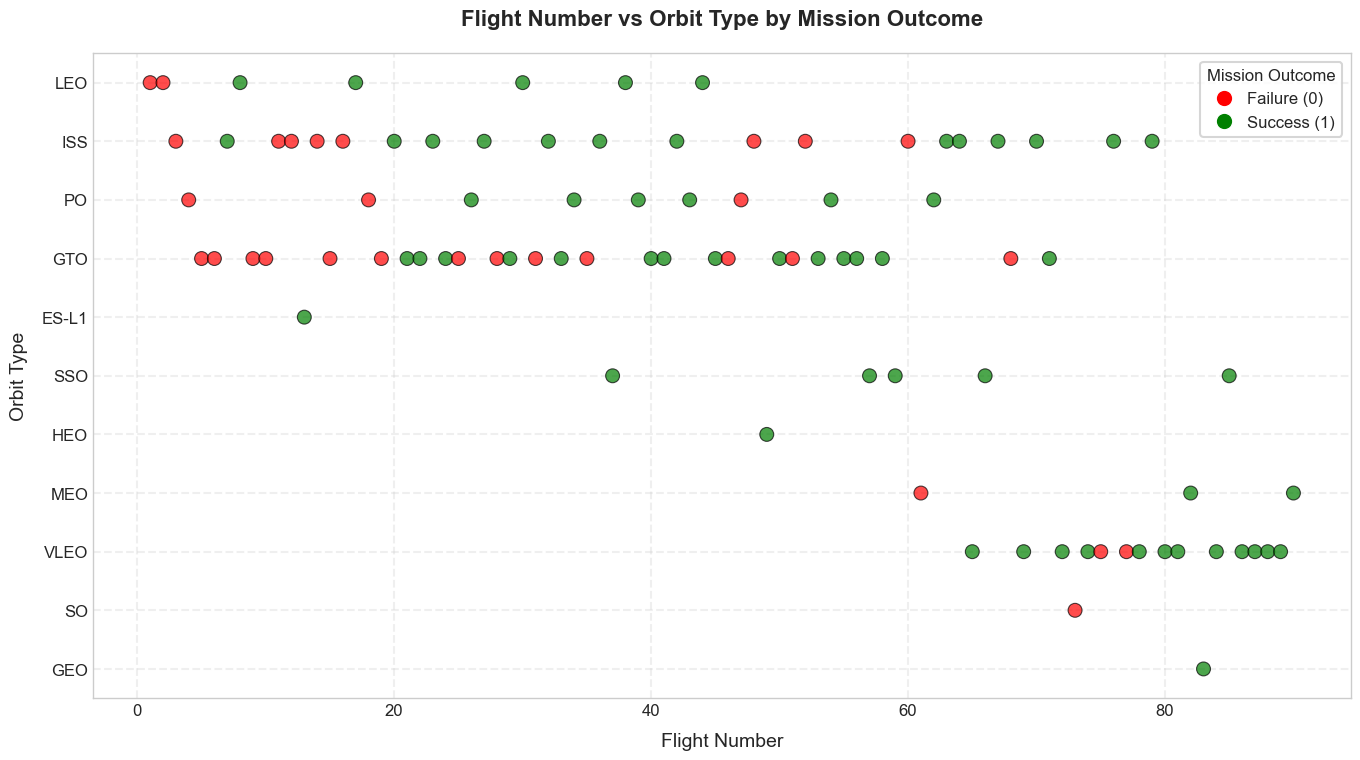

In [62]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.figure(figsize=(14, 8))

# Create scatter plot with enhanced aesthetics
scatter = sns.scatterplot(
    x='FlightNumber',
    y='Orbit',
    hue='Class',
    data=df,
    palette={0: 'red', 1: 'green'},
    s=100,  # Larger point size
    alpha=0.7,
    edgecolor='black',
    linewidth=0.8
)

# Customize title and labels
plt.title('Flight Number vs Orbit Type by Mission Outcome', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Flight Number', fontsize=14, labelpad=10)
plt.ylabel('Orbit Type', fontsize=14, labelpad=10)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='both', linestyle='--', alpha=0.3)

# Create custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Failure (0)',
           markerfacecolor='red', markersize=12),
    Line2D([0], [0], marker='o', color='w', label='Success (1)',
           markerfacecolor='green', markersize=12)
]

# Position legend
plt.legend(
    handles=legend_elements,
    title="Mission Outcome",
    loc='best',
    frameon=True,
    fontsize=12,
    title_fontsize=12,
    bbox_to_anchor=(1, 1),  # Top right position
    handletextpad=0.4
)

# Adjust layout
plt.tight_layout()
plt.show()

You can observe that in the LEO orbit, success seems to be related to the flight number. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


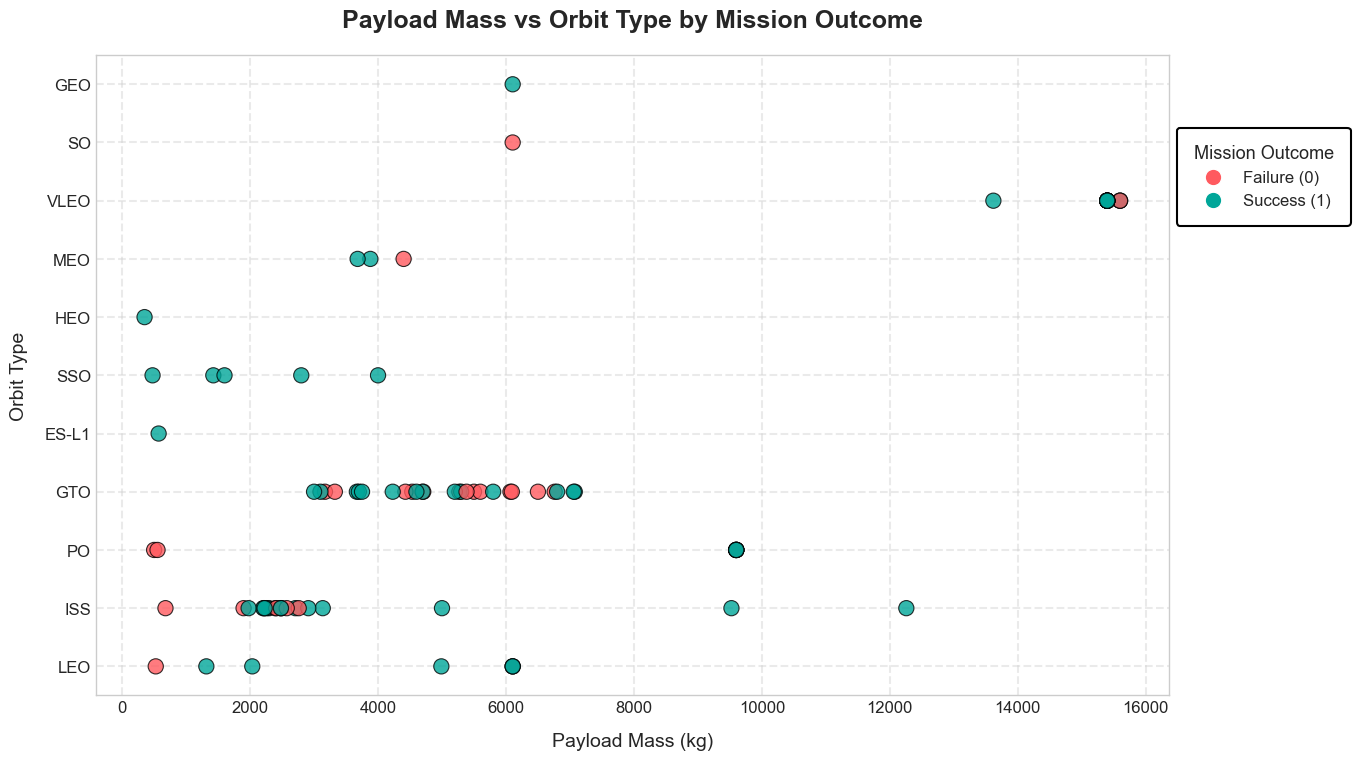

In [63]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

plt.figure(figsize=(14, 8))


# Create scatter plot with enhanced aesthetics
scatter = sns.scatterplot(
    x='PayloadMass',
    y='Orbit',
    hue='Class',
    data=df,
    palette={0: '#FF5A5F', 1: '#00A699'},  # Custom colors (red/green)
    s=120,  # Larger point size
    alpha=0.8,
    edgecolor='black',
    linewidth=0.8
)

# Adjust y-axis to show Orbit types
scatter.set_yticks(range(len(df['Orbit'].unique())))
scatter.set_yticklabels(df['Orbit'].unique())
scatter.set_ylim(-0.5, len(df['Orbit'].unique())-0.5)

# Customize title and labels
plt.title('Payload Mass vs Orbit Type by Mission Outcome', 
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Payload Mass (kg)', fontsize=14, labelpad=12)
plt.ylabel('Orbit Type', fontsize=14, labelpad=12)

# Customize ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.grid(axis='both', linestyle='--', alpha=0.4)

# Create custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Failure (0)',
           markerfacecolor='#FF5A5F', markersize=12, markeredgewidth=1),
    Line2D([0], [0], marker='o', color='w', label='Success (1)',
           markerfacecolor='#00A699', markersize=12, markeredgewidth=1)
]

# Position legend
plt.legend(
    handles=legend_elements,
    title="Mission Outcome",
    title_fontsize=13,
    fontsize=12,
    frameon=True,
    framealpha=1,
    edgecolor='black',
    bbox_to_anchor=(1, 0.9),  # Upper right position
    borderpad=1
)


plt.tight_layout()
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [64]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


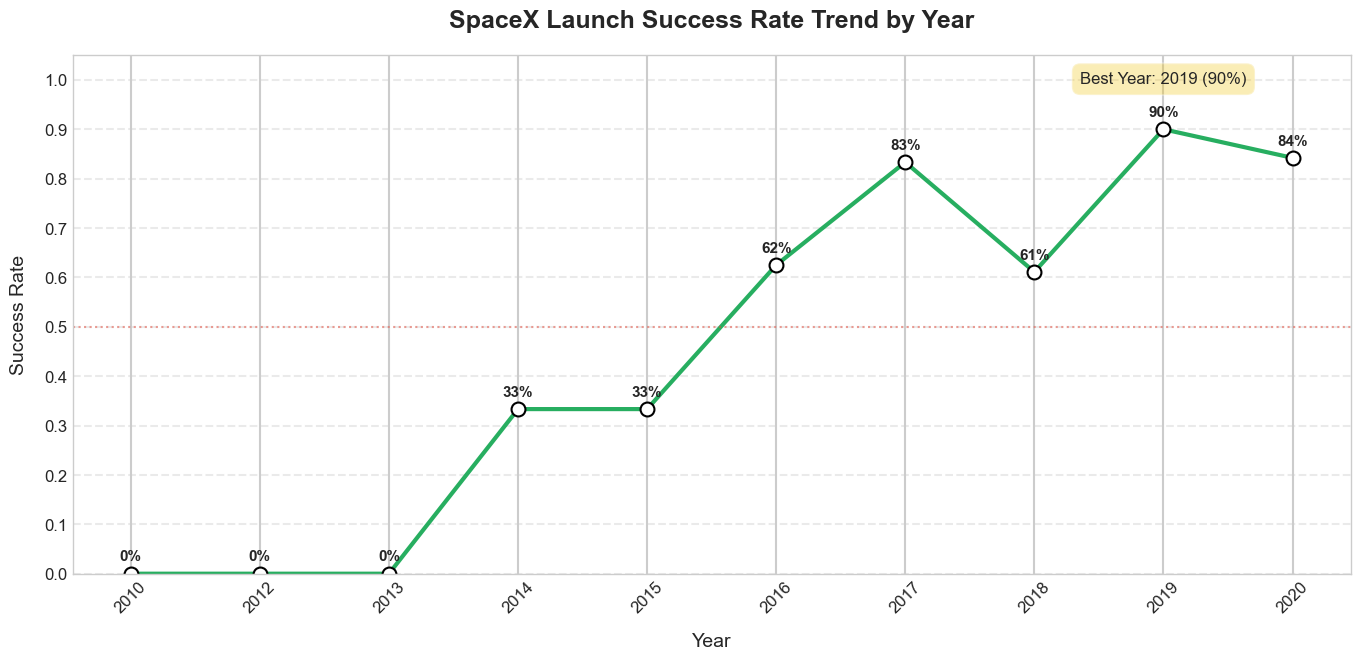

In [68]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate success rate by year (using the already extracted year in 'Date' column)
success_rate = df.groupby('Date')['Class'].mean().reset_index()
success_rate = success_rate.sort_values('Date')  # Ensure chronological order

plt.figure(figsize=(14, 7))

# Create line plot with enhanced styling
ax = sns.lineplot(
    x='Date',
    y='Class',
    data=success_rate,
    marker='o',
    markersize=10,
    linewidth=3,
    color='#27ae60',  # Professional green
    markeredgecolor='black',
    markeredgewidth=1.5,
    markerfacecolor='white'
)

# Customize title and labels
plt.title('SpaceX Launch Success Rate Trend by Year', 
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Year', fontsize=14, labelpad=12)
plt.ylabel('Success Rate', fontsize=14, labelpad=12)

# Customize ticks and grid
plt.xticks(fontsize=12, rotation=45)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels
for index, row in success_rate.iterrows():
    ax.text(row['Date'], row['Class'] + 0.02, f"{row['Class']:.0%}",
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add reference lines and annotations
plt.axhline(y=0.5, color='#e74c3c', linestyle=':', alpha=0.5, linewidth=1.5)
max_rate = success_rate['Class'].max()
max_year = success_rate[success_rate['Class'] == max_rate]['Date'].values[0]
plt.annotate(f'Best Year: {max_year} ({max_rate:.0%})',
             xy=(max_year, max_rate+ 0.05),
             xytext=(0, 15),
             textcoords='offset points',
             ha='center',
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', fc='#f1c40f', alpha=0.3))

# Adjust layout
plt.tight_layout()
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [69]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [70]:
# HINT: Use get_dummies() function on the categorical columns
# Apply one-hot encoding to categorical columns
features_one_hot = pd.get_dummies(
    features, 
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'],
    prefix=['Orbit', 'Site', 'Pad', 'Serial']  # Custom prefixes for clarity
)

# Display the first 5 rows of the resulting dataframe
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [72]:
# HINT: use astype function
# First check current dtypes
print("Before conversion:")
print(features_one_hot.dtypes.value_counts())

# Convert all numeric columns to float64
features_one_hot = features_one_hot.apply(
    lambda x: x.astype('float64') if pd.api.types.is_numeric_dtype(x) else x
)

# Verify conversion
print("\nAfter conversion:")
print(features_one_hot.dtypes.value_counts())

# Sample output of first few rows
features_one_hot.head(3)

Before conversion:
bool       75
int64       3
float64     2
Name: count, dtype: int64

After conversion:
float64    80
Name: count, dtype: int64


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [74]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
